In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

### Decision Tree and Random Forest Assignment


Problem Statement:
You work in XYZ Company as a Python. The company officials want you to build machine learning models.

Tasks to be performed:

1.	Build a decision tree classifier:
- Import diabetes datasets
- Split it into X and Y
- Split X and Y into 70% training set and 30% testing set
- Train a Decision Tree Classifier
- Make Predictions
- Caclulate its accuracy
    
2.	Build a random tree classifier:
   	- Import diabetes datasets
- Split it into X and Y
- Split X and Y into 70% training set and 30% testing set
- Train a Random Forest Classifier
- Make Predictions
- Caclulate its accuracy
    




In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


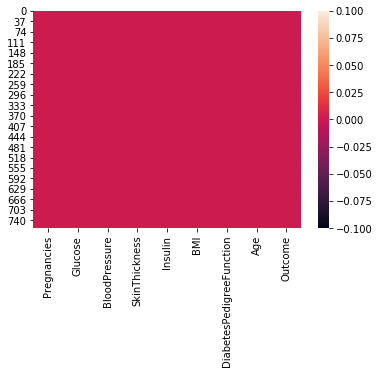

In [4]:
sns.heatmap(df.isnull())

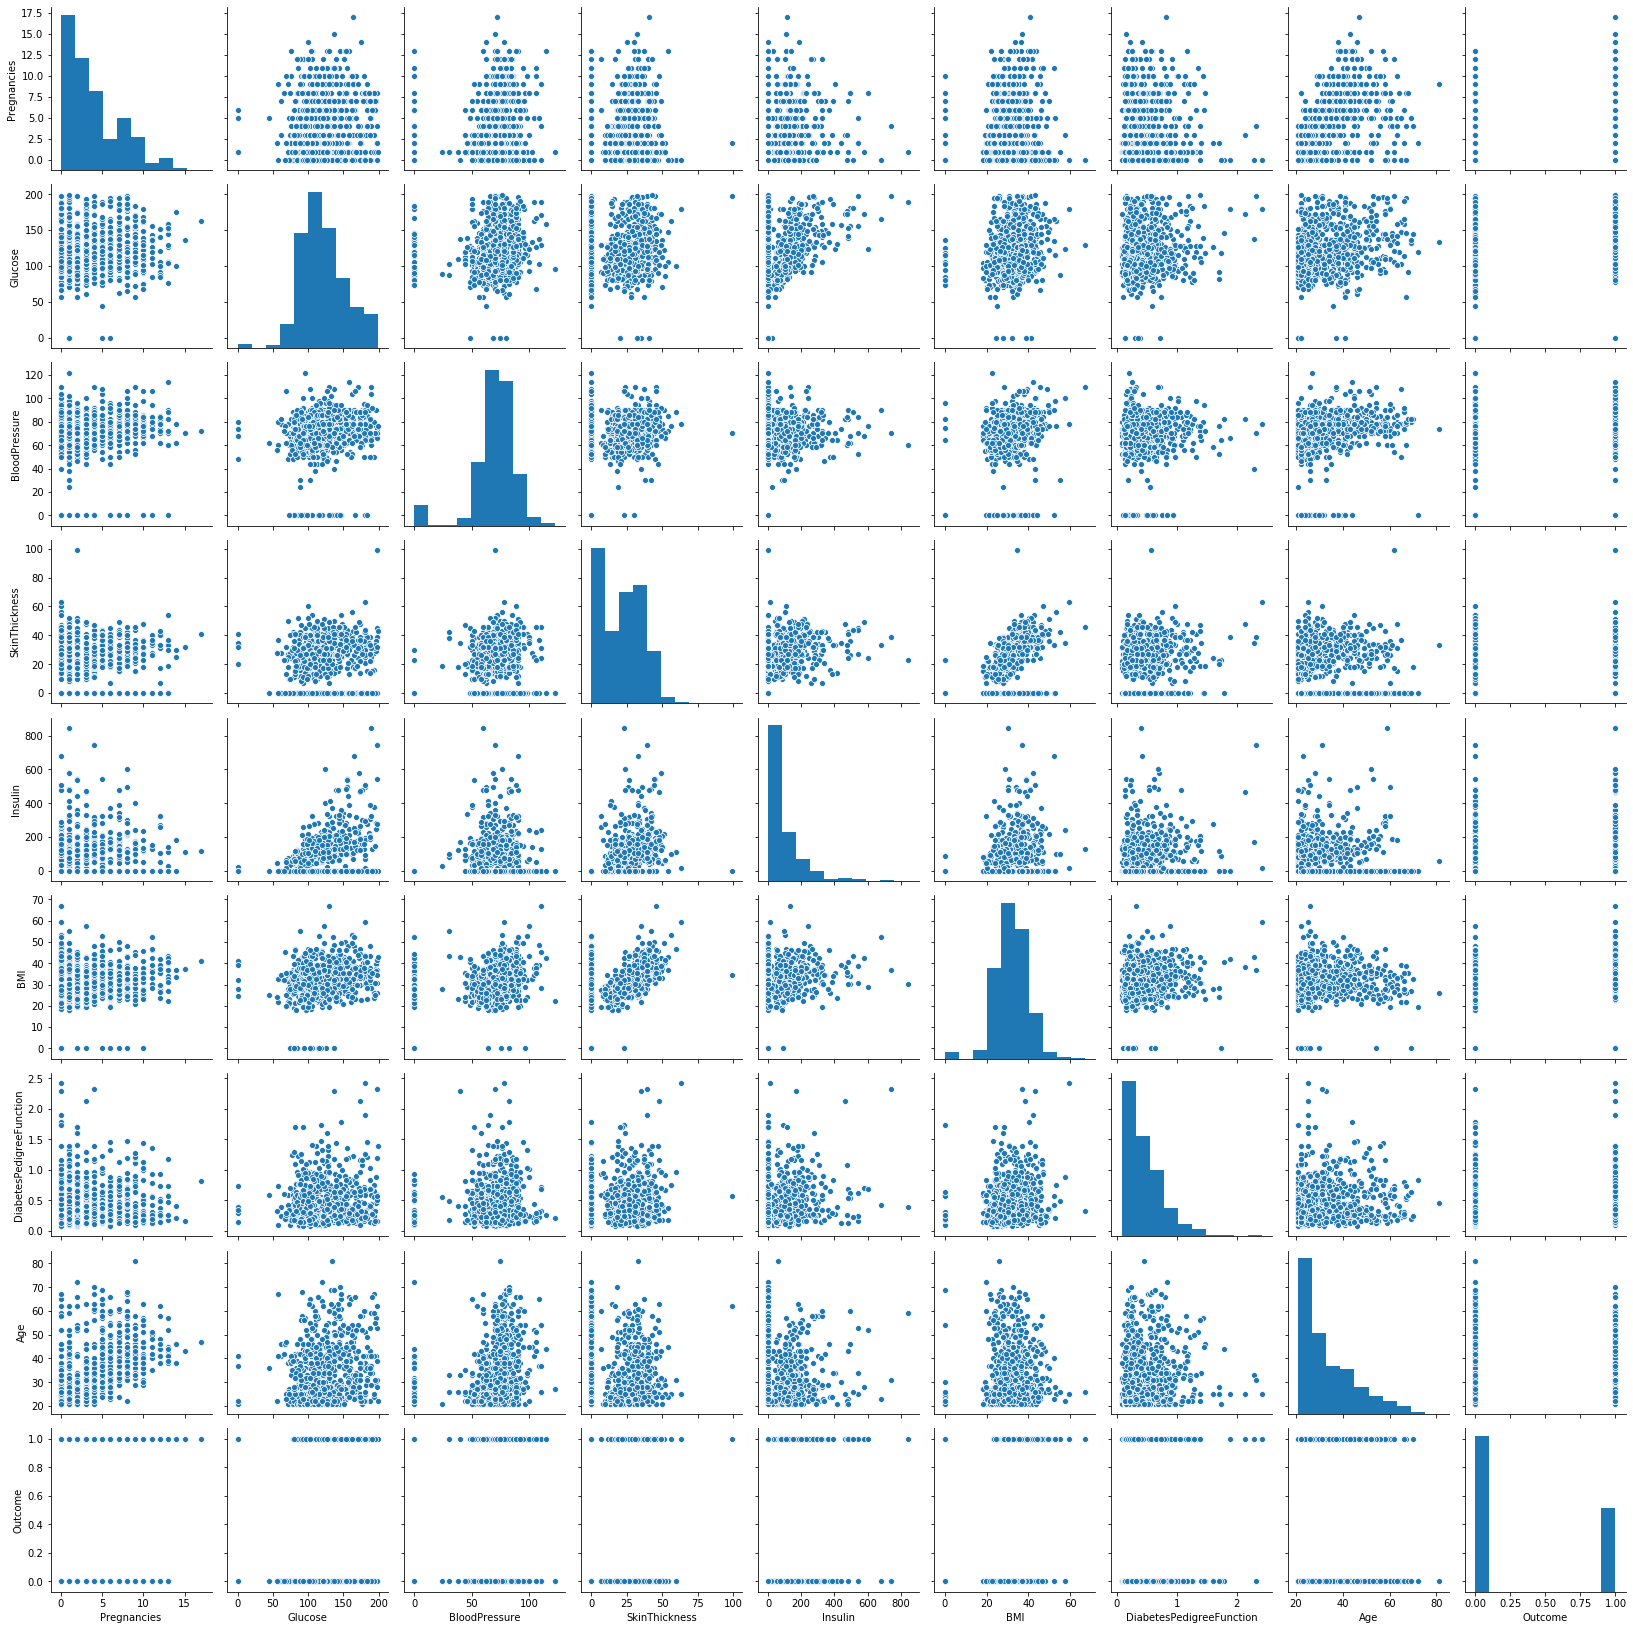

In [5]:
sns.pairplot(df)

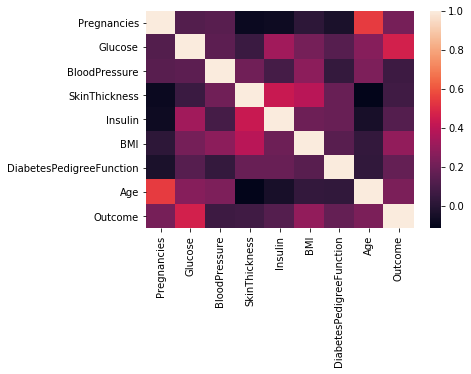

In [6]:
sns.heatmap(df.corr())

### build Decision Tree on Out come 

In [7]:
x = pd.DataFrame(df.drop('Outcome', axis = 1))
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y = pd.DataFrame(df['Outcome'])
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [9]:
#split data set in t training and Test 
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state =  123)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DTC = DecisionTreeClassifier()

In [13]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
#prediction 
y_pred = DTC.predict(x_test)

In [15]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[Text(191.74813338926174, 211.4, 'X[1] <= 154.5\ngini = 0.446\nsamples = 537\nvalue = [357, 180]'),
 Text(79.03049496644296, 199.32, 'X[5] <= 26.35\ngini = 0.384\nsamples = 456\nvalue = [338, 118]'),
 Text(17.975838926174497, 187.24, 'X[7] <= 59.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(8.987919463087248, 175.16, 'X[6] <= 0.675\ngini = 0.02\nsamples = 101\nvalue = [100, 1]'),
 Text(4.493959731543624, 163.07999999999998, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(13.481879194630872, 163.07999999999998, 'X[6] <= 0.688\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(8.987919463087248, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(17.975838926174497, 151.0, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(26.963758389261745, 175.16, 'X[6] <= 0.343\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(22.469798657718123, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(31.457718120805367, 163.07999999999998, 'gini = 0.0\nsample

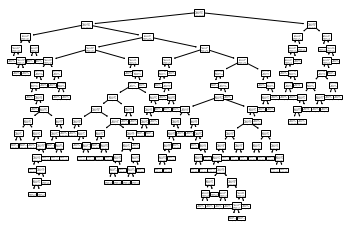

In [16]:
tree.plot_tree(DTC)

In [17]:
print("Classification Report :\n", classification_report(y_test, y_pred),'\n')
print("ConfusionMatrics :\n", confusion_matrix(y_test, y_pred),'\n')
print("Accurracy :\n", accuracy_score(y_test, y_pred),'\n')

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       143
           1       0.61      0.61      0.61        88

    accuracy                           0.70       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.70      0.70      0.70       231
 

ConfusionMatrics :
 [[108  35]
 [ 34  54]] 

Accurracy :
 0.7012987012987013 



In [18]:
fn = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [19]:
cn= df['Outcome']

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [23]:
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [25]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [26]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<X<SUB>1</SUB> &le; 154.5<br/>gini = 0.446<br/>samples = 537<br/>value = [357, 180]>, fillcolor="#f2c19d"] ;\n1 [label=<X<SUB>5</SUB> &le; 26.35<br/>gini = 0.384<br/>samples = 456<br/>value = [338, 118]>, fillcolor="#eead7e"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<X<SUB>7</SUB> &le; 59.0<br/>gini = 0.037<br/>samples = 107<br/>value = [105, 2]>, fillcolor="#e5833d"] ;\n1 -> 2 ;\n3 [label=<X<SUB>6</SUB> &le; 0.675<br/>gini = 0.02<br/>samples = 101<br/>value = [100, 1]>, fillcolor="#e5823b"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 85<br/>value = [85, 0]>, fillcolor="#e58139"] ;\n3 -> 4 ;\n5 [label=<X<SUB>6</SUB> &le; 0.688<br/>gini = 0.117<br/>samples = 16<br/>value = [15, 1]>, fillcolor="#e78946"] ;\n3 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]>, fillcolor="#399de5"] ;\n5 -> 6 ;\n7 [label=<

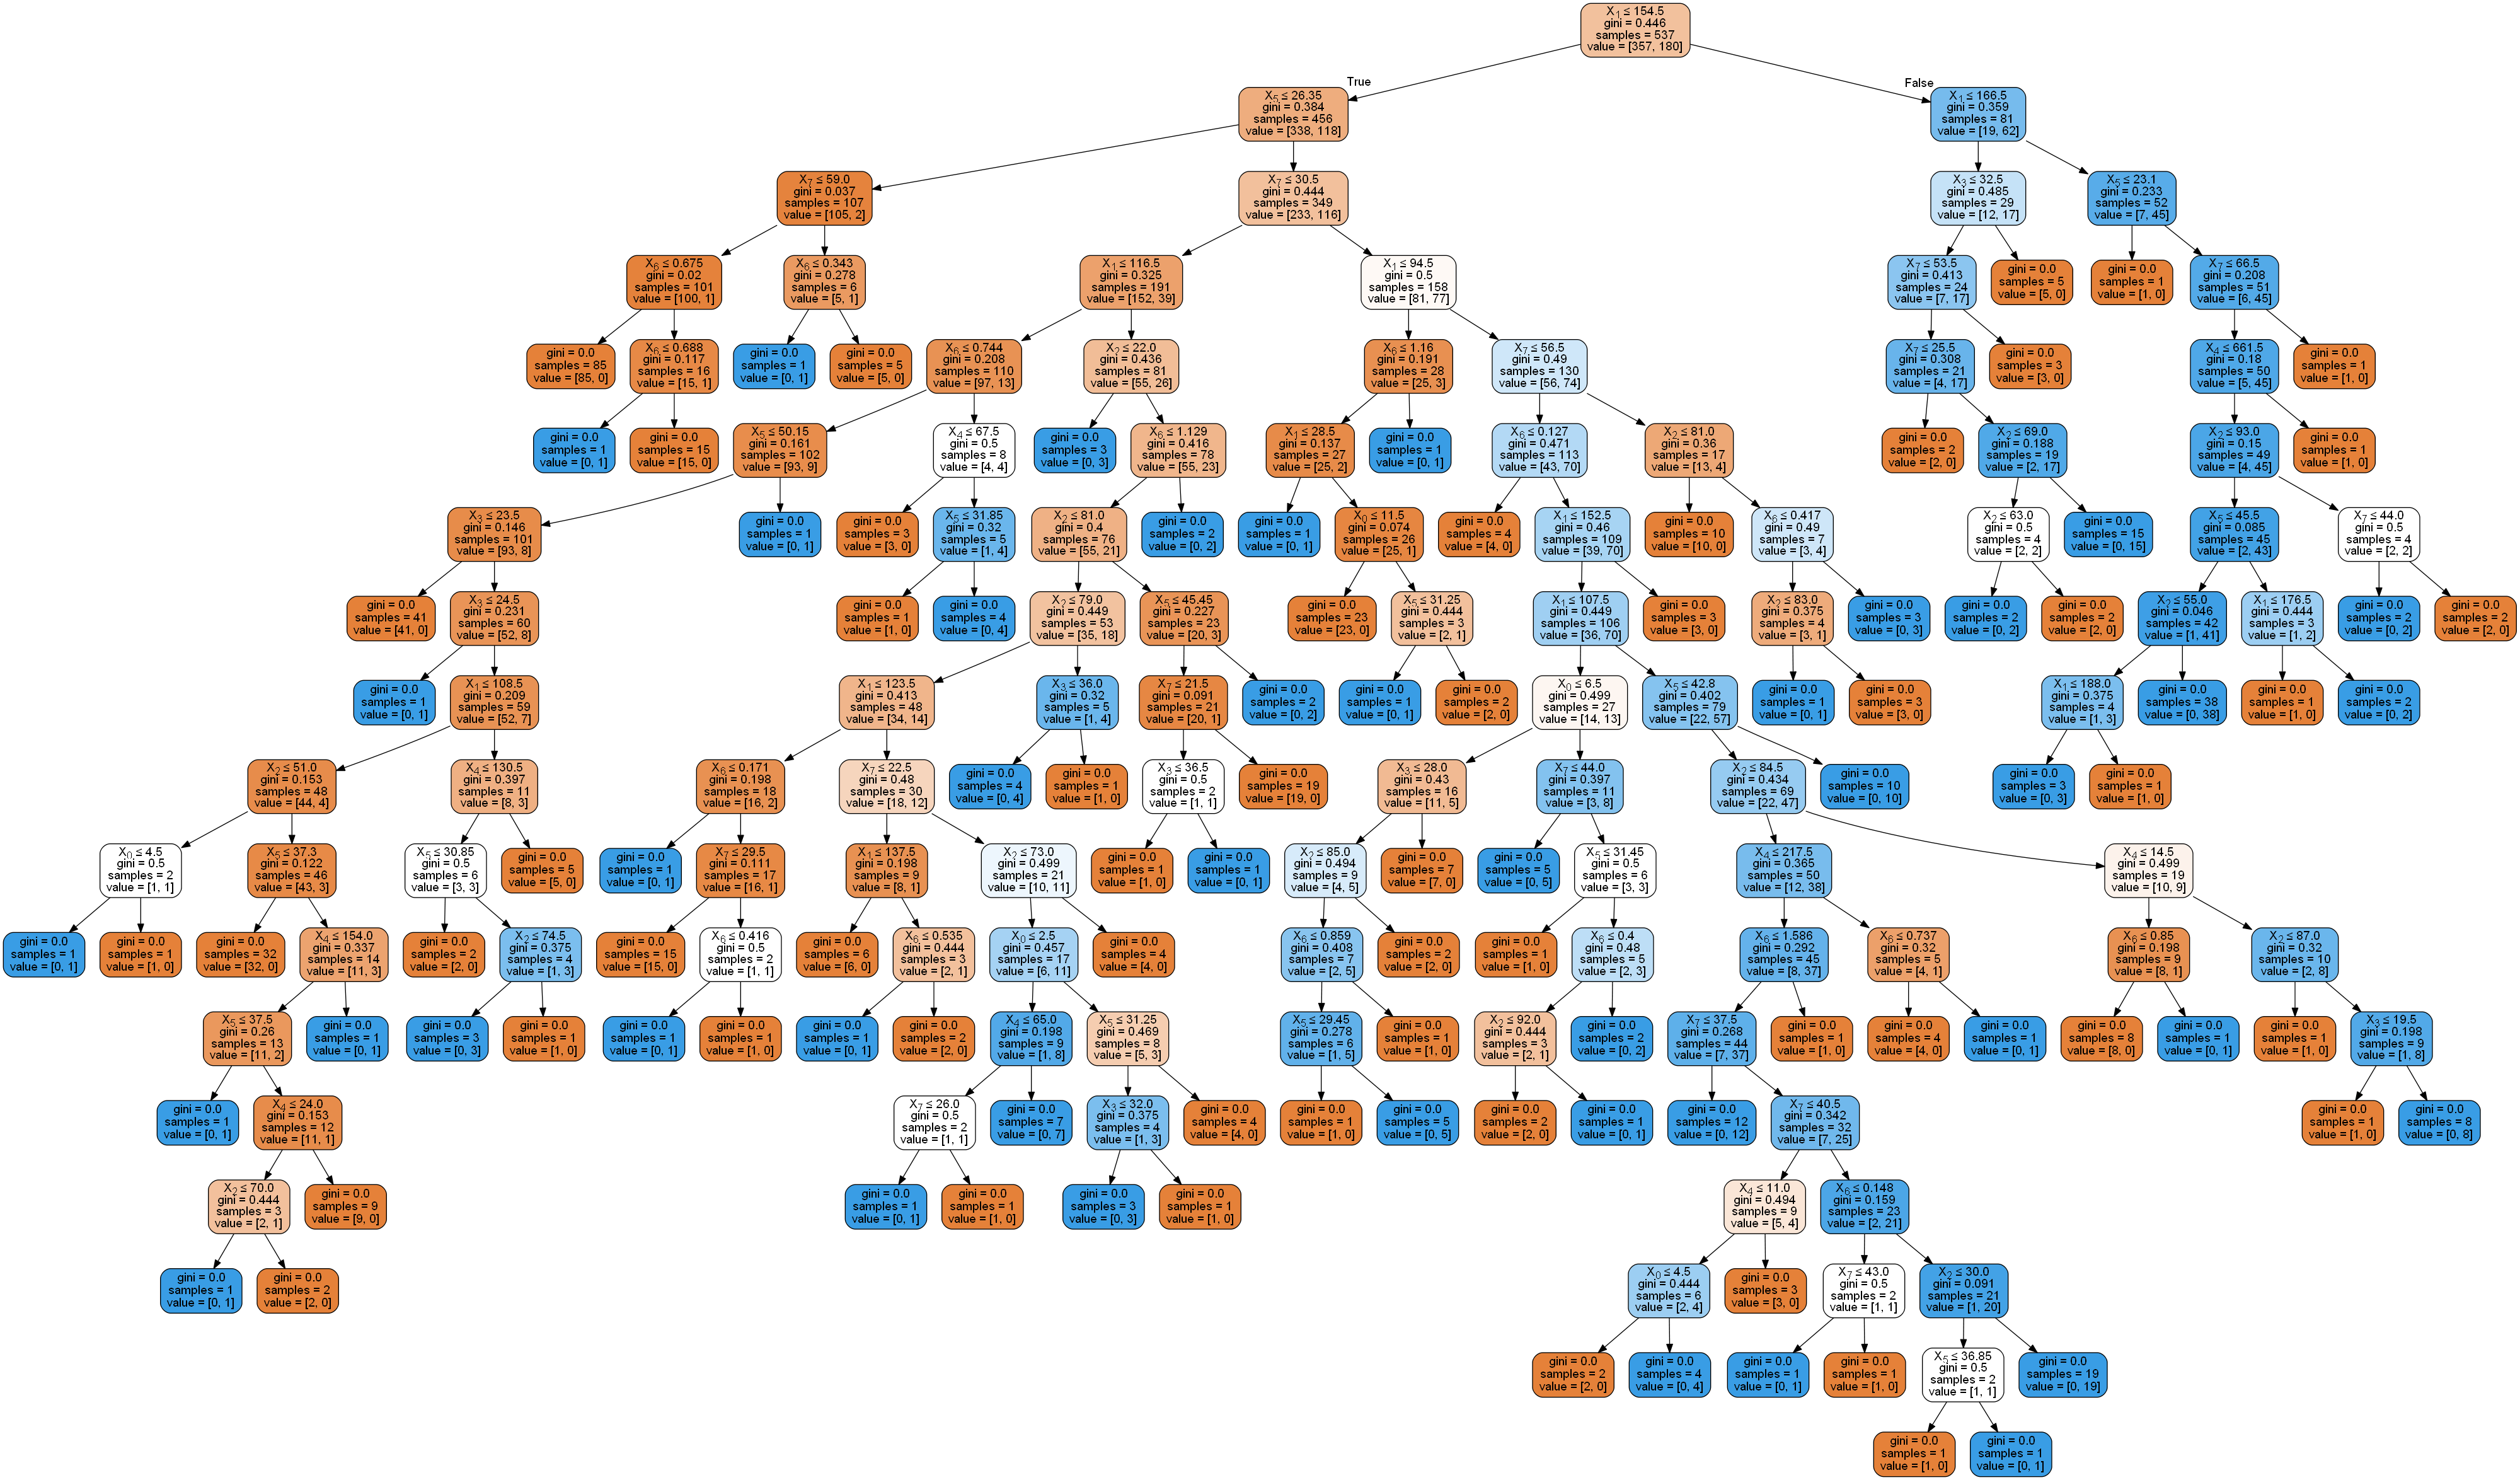

In [27]:
Image(graph.create_png())

## Randm Forest 

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
y_rfp = RF.predict(x_test) 

In [184]:
print("Classification Report :\n", classification_report(y_test, y_rfp),'\n')
print("ConfusionMatrics :\n", confusion_matrix(y_test,y_rfp),'\n')
print("Accurracy :\n", accuracy_score(y_test, y_rfp),'\n')

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       143
           1       0.70      0.64      0.67        88

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.75      0.76      0.76       231
 

ConfusionMatrics :
 [[119  24]
 [ 32  56]] 

Accurracy :
 0.7575757575757576 



# Linear Regression
Tasks to be performed:

1.	Load the dataset using pandas.
2.	Separate Dataset into training and testing sets
3.	Train a model to make predictions based on number of years as experience.
4.	Plot and visualize the training data, testing data and the regression line
5.	Check the model accuracy using the R2 score of the model



In [114]:
Data = pd.read_csv('D:\Data Science\Python for DS\Assignments\ASSIGNMENT-8211-SUPERVISED-LEARNING-20JUN2020150242\data.csv')

In [116]:
Data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


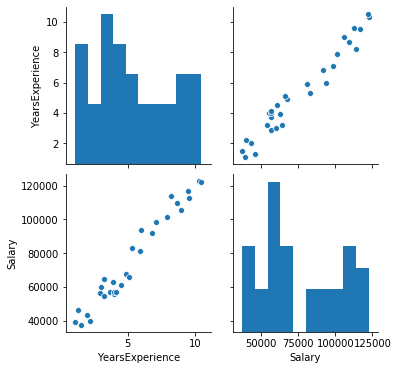

In [118]:
sns.pairplot(Data)

In [120]:
from sklearn.linear_model import LinearRegression

In [122]:
LM = LinearRegression()

In [131]:
x = pd.DataFrame(Data['Salary'])
y =pd.DataFrame(Data['YearsExperience'])

In [132]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [133]:
LM.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
y_results = LM.predict(x_test)

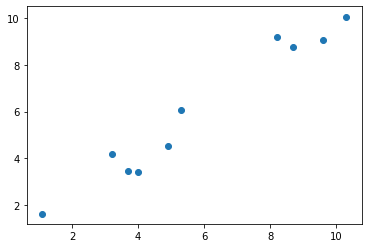

In [138]:
plt.scatter(y_test, y_results)

In [144]:
error = y_test - y_results

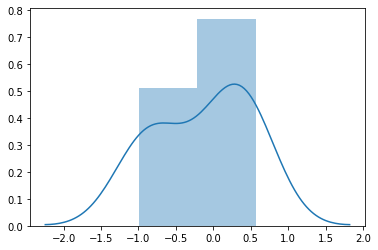

In [146]:
sns.distplot(error)

In [150]:
#prediction eveluation 

from sklearn import metrics


In [152]:
metrics.mean_absolute_error(y_test, y_results)

0.5291762774095773

In [154]:
metrics.mean_squared_error(y_test, y_results)

0.3715348217739925

In [155]:
np.sqrt(metrics.mean_squared_error(y_test, y_results))

0.6095365631149559